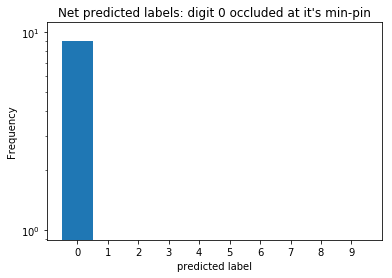

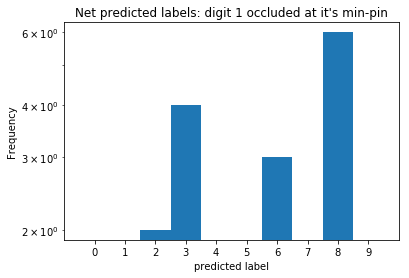

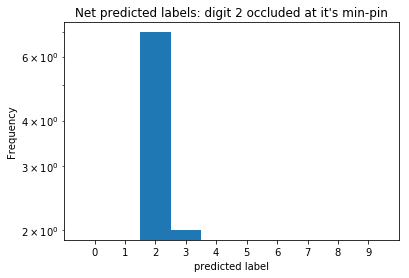

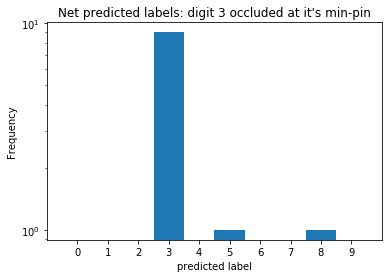

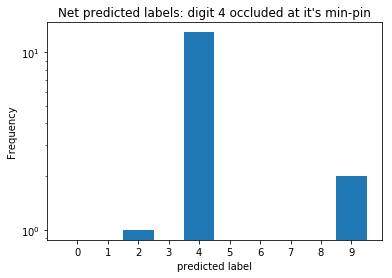

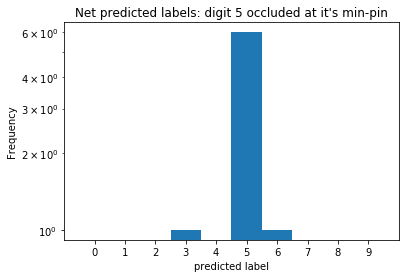

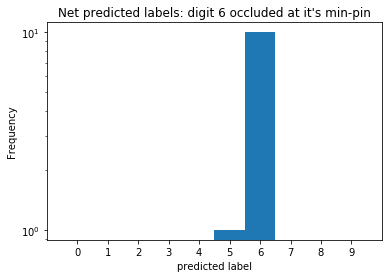

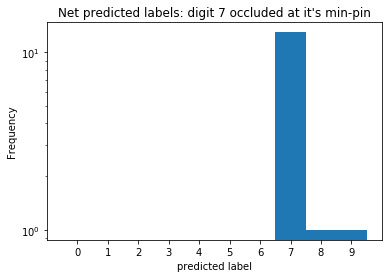

/home/radillo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


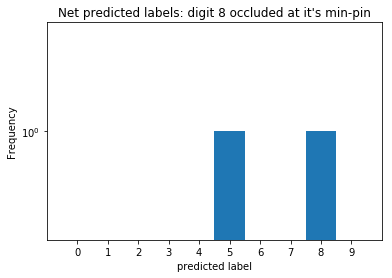

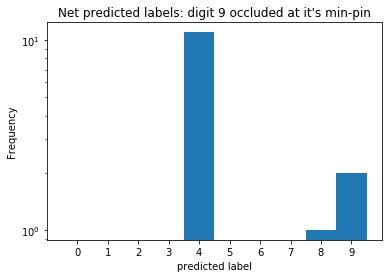

done!


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from mnist_helper_functions import get_inds
import matplotlib.pyplot as plt
%matplotlib inline
import pickle


# mnist0 = input_data.read_data_sets("MNIST_data/", one_hot=False)
# N = 110
# images       = mnist0.test.images[0:N]
# images       = images.reshape((-1, 28, 28))
# labels0      = mnist0.test.labels[0:N] #one_hot = False

# inds_dict = get_inds(labels0)

pkl_file    = open('pred_labels.pkl', 'rb')
pred_labels = pickle.load(pkl_file)
pkl_file.close()

min_pins_arr = np.load('min_pins_arr.npy')
def draw_occ_images_and_hists(pred_labels):
    for d in range(10):
#         inds         = inds_dict[d]
#         print("total number of %d's in test set: "%d)
#         print(len(inds))
#         occ_image    = images[inds].copy()[0]
#         pin          = min_pins_arr[d]
#         print("min accuracy patch pins (i,j)-pixel indices on %d's:"%d)
#         print(pin)
        #perform occlusion
#         occ_image[pin[0,0]: pin[0,1], pin[1,0]: pin[1,1]] = 0
#         plt.imshow(occ_image)
#         plt.show()
        plt.figure()
        plt.hist(pred_labels[d], normed=False, bins=[-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], align='mid', log=True)
        plt.title("Net predicted labels: digit %d occluded at it's min-pin"%d)
        plt.xlabel("predicted label")
        plt.xlim([-1,10])
        plt.xticks( np.arange(10) )
        plt.ylabel("Frequency")
        plt.show()
draw_occ_images_and_hists(pred_labels)

print("done!")

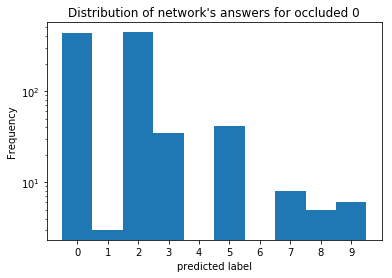

In [26]:
a=[2,2,2,2,2,0,0,2,0,0,2,0,2,0,0,0,2,2,0,0,2,0,0,0,0,2,2,7,2,0,0,0,0,3,2,2,0,0,2,2,2,7,2,2,0,5,0,0,0,0,0,2,0,0,2,2,2,2,2,0,2,2,0,3,0,2,2,2,0,2,0,2,2,0,2,2,2,2,2,0,0,2,2,0,2,2,2,2,0,5,0,0,0,2,2,0,0,0,0,0,2,2,0,2,2,3,2,0,0,0,2,2,2,0,2,3,0,2,0,0,5,2,0,0,0,2,2,2,0,2,2,2,0,2,2,0,0,3,2,5,0,0,2,0,0,0,0,2,2,0,2,7,2,2,2,0,0,2,2,2,0,2,2,3,2,2,0,5,0,2,0,0,2,9,0,5,2,2,3,2,0,0,2,2,2,0,2,2,0,3,0,0,0,0,2,0,5,0,0,2,5,2,2,2,0,0,3,2,2,5,0,2,2,0,2,0,2,0,2,2,2,0,2,2,0,2,2,2,2,2,0,0,0,2,2,0,0,0,5,0,8,2,2,0,2,0,2,0,2,2,0,2,2,0,2,0,2,0,2,5,2,0,0,2,0,0,0,2,2,0,0,5,5,0,0,0,2,2,2,2,2,0,0,2,2,2,0,0,2,2,2,0,0,0,2,0,0,2,0,2,2,0,0,2,2,2,2,2,2,2,2,0,2,0,2,2,2,2,0,2,0,2,0,2,3,0,7,2,0,0,2,0,2,0,0,2,2,2,5,2,0,2,0,2,0,0,7,2,5,0,2,2,2,0,2,0,0,0,0,2,0,2,0,2,0,0,2,0,0,0,0,0,2,5,0,2,0,2,0,0,0,2,0,5,0,0,3,0,2,2,0,0,0,0,2,2,0,2,0,0,5,0,0,2,0,2,0,0,0,2,2,2,2,2,2,2,0,0,0,2,2,0,2,0,2,2,5,0,0,2,3,0,0,0,2,2,2,2,0,2,0,0,2,2,2,0,0,0,2,8,0,0,0,2,0,0,2,0,0,5,0,0,2,0,0,0,0,0,0,0,0,2,2,0,2,0,0,0,5,0,9,2,2,0,0,0,0,2,3,2,2,0,2,0,0,2,2,2,2,2,2,0,7,0,2,0,0,5,5,0,5,0,5,2,2,0,0,0,0,2,2,2,2,2,0,0,2,2,2,2,0,0,2,0,2,5,0,2,2,2,2,2,2,2,2,0,0,2,1,0,0,2,2,1,0,2,8,2,2,3,0,3,3,2,3,3,2,2,3,3,3,3,2,5,0,5,0,2,0,0,0,2,2,5,5,3,2,2,0,0,3,2,0,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,0,0,0,0,3,2,0,5,5,0,2,2,0,5,0,5,7,2,2,0,0,8,2,2,0,2,2,2,2,2,2,2,0,2,2,0,3,0,3,2,0,2,2,2,2,0,2,2,2,2,2,0,0,2,2,0,0,2,2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,2,3,2,2,0,2,2,0,0,2,2,2,2,0,0,5,2,0,0,0,2,0,0,2,0,2,2,0,2,2,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,3,2,0,0,2,2,0,0,0,0,2,0,0,2,2,5,2,0,5,2,2,0,2,2,2,0,2,5,2,5,2,0,0,2,0,2,9,2,0,2,2,2,2,0,0,2,2,0,2,2,0,2,2,2,2,0,2,2,0,0,0,0,2,2,3,2,0,9,9,0,0,5,0,2,0,2,2,2,0,3,2,2,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,2,2,2,2,2,3,0,0,2,2,2,2,2,2,2,2,2,2,2,2,9,2,2,2,0,3,2,0,5,2,0,2,2,0,0,2,2,0,2,0,0,2,0,2,2,2,2,2,0,0,2,0,2,0,0,0,0,2,0,0,0,2,0,2,2,0,2,0,0,0,2,2,0,0,0,0,2,0,2,2,0,0,2,2,0,0,3,2,0,0,0,0,2,2,0,7,0,0,1,0,0,0,0,0,0,0,2,2,0,0,0,2,2,0,0,2,0,0,0,0,8,0,0,0,2,2,2,0,2,0,2,0,0,0,2,3]
plt.hist(a, normed=False, bins=[-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], align='mid', log=True)
plt.title("Distribution of network's answers for occluded 0")
plt.xlabel("predicted label")
plt.xlim([-1,10])
plt.xticks( np.arange(10) )
plt.ylabel("Frequency")
plt.show()

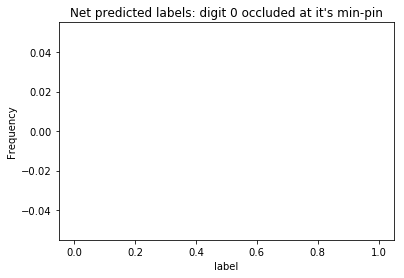

In [27]:
b=[]
plt.hist(b, normed=False, bins=10)
plt.title("Net predicted labels: digit 0 occluded at it's min-pin")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()